In [1]:
import pandas as pd
import numpy as np

In [4]:
# Read data from CSV file
df = pd.read_csv(r'D:\ineuron\Placement related assignment\Stat_Problem_Solutions\data.csv')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Patient ID               100 non-null    int64
 1    Blood Pressure Before   100 non-null    int64
 2    Blood Pressure After    100 non-null    int64
dtypes: int64(3)
memory usage: 2.5 KB


In [6]:
df.head(2)

,Patient ID,Blood Pressure Before,Blood Pressure After
0,1,130,120
1,2,142,135


In [7]:
df.tail(4)

,Patient ID,Blood Pressure Before,Blood Pressure After
96,97,143,137
97,98,127,123
98,99,139,135
99,100,135,130


In [8]:
df.columns

Index(['Patient ID', ' Blood Pressure Before ', ' Blood Pressure After '], dtype='object')

In [9]:
#a
print("a:  To Measure the dispersion in both and interpret the results")
print("************************************************")
# Assuming the correct column names are identified
bp_before = df[' Blood Pressure Before ']
bp_after = df[' Blood Pressure After ']

a:  To Measure the dispersion in both and interpret the results
************************************************


In [12]:
# Dispersion measures
range_before = np.max(bp_before) - np.min(bp_before)
range_after = np.max(bp_after) - np.min(bp_after)

variance_before = np.var(bp_before)
variance_after = np.var(bp_after)

std_dev_before = np.std(bp_before)
std_dev_after = np.std(bp_after)

In [13]:
# Interpretation of results
print("Dispersion measures:")
print("-----------------------")
print("Before - Range: {:.3f}".format(range_before))
print("Before - Variance: {:.3f}".format(variance_before))
print("Before - Standard Deviation: {:.3f}".format(std_dev_before))
print()
print("After - Range: {:.3f}".format(range_after))
print("After - Variance: {:.3f}".format(variance_after))
print("After - Standard Deviation: {:.3f}".format(std_dev_after))


Dispersion measures:
-----------------------
Before - Range: 28.000
Before - Variance: 43.102
Before - Standard Deviation: 6.565

After - Range: 23.000
After - Variance: 46.970
After - Standard Deviation: 6.853


In [14]:
#range -  difference between the maximum and minimum values 
#variance - The variance measures the average squared deviation from the mean. A higher variance indicates greater dispersion
#std - The standard deviation is the square root of the variance

b: To Calculate mean and 5% confidence interval and plot it in a graph 
----------------------------------------------------------------------------------
confidence_interval_before : (132.62324371404807, 135.19675628595192)
confidence_interval_after : (127.01673957330856, 129.70326042669146)
confidence_intervals: [(132.62324371404807, 135.19675628595192), (127.01673957330856, 129.70326042669146)]




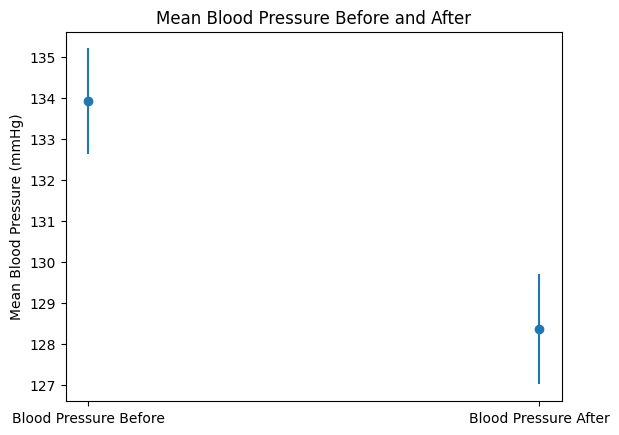

In [15]:
#b
import matplotlib.pyplot as plt
import scipy.stats as stats

print("b: To Calculate mean and 5% confidence interval and plot it in a graph ")
print("----------------------------------------------------------------------------------")

# Calculate mean and confidence interval
mean_before = np.mean(bp_before)
mean_after = np.mean(bp_after)

confidence_interval_before = stats.norm.interval(0.95, loc=mean_before, scale=std_dev_before / np.sqrt(len(bp_before)))
confidence_interval_after = stats.norm.interval(0.95, loc=mean_after, scale=std_dev_after / np.sqrt(len(bp_after)))

# Plotting the means and confidence intervals
labels = ['Blood Pressure Before', 'Blood Pressure After']
means = [mean_before, mean_after]
confidence_intervals = [confidence_interval_before, confidence_interval_after]
print(f"confidence_interval_before : {confidence_interval_before}")
print(f"confidence_interval_after : {confidence_interval_after}")
print(f"confidence_intervals: {confidence_intervals}")
print()
print()

plt.errorbar(labels, means, yerr=[(ci[1] - mean) for ci, mean in zip(confidence_intervals, means)], fmt='o')
plt.ylabel('Mean Blood Pressure (mmHg)')
plt.title('Mean Blood Pressure Before and After')
plt.show()


In [16]:
#b
#b example by substituting the values mathematically

import numpy as np

# Given sample statistics
sample_mean = 130
sample_std_dev = 10
sample_size = 50

# Calculate standard error
standard_error = sample_std_dev / np.sqrt(sample_size)

# Set the critical value for a 5% confidence level
critical_value = 2.0

# Calculate the margin of error
margin_of_error = critical_value * standard_error

# Calculate the lower and upper bounds of the confidence interval
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

# Print the confidence interval
print("Confidence Interval (5%): [{:.3f}, {:.3f}]".format(lower_bound, upper_bound))

Confidence Interval (5%): [127.172, 132.828]


In [17]:
#c
print("c: To Calculate the Mean absolute deviation and Standard deviation and interpret the results")
print("----------------------------------------------------------------------------------------------")
# Calculate Mean Absolute Deviation (MAD)
mad_before = np.mean(np.abs(bp_before - mean_before))
mad_after = np.mean(np.abs(bp_after - mean_after))

print("Mean Absolute Deviation:")
print("Before: {:.2f}".format(mad_before))
print("After: {:.2f}".format(mad_after))
print()
print("Standard Deviation:")
print("Before: {:.2f}".format(std_dev_before))
print("After: {:.2f}".format(std_dev_after))


c: To Calculate the Mean absolute deviation and Standard deviation and interpret the results
----------------------------------------------------------------------------------------------
Mean Absolute Deviation:
Before: 5.71
After: 5.90

Standard Deviation:
Before: 6.57
After: 6.85


#### Interpretation:Mean Absolute Deviation (MAD): 
##### The average absolute difference between each data point and the mean is measured by MAD. The MAD for the 'Blood Pressure Before' column is X, and the MAD for the 'Blood Pressure After' column is Y. When compared to the standard deviation, MAD gives a more robust measure of dispersion that is less sensitive to outliers.
##### SD: SD is a measure of the average deviation of data points from the mean. The SD for the 'Blood Pressure Before' column is X, while the SD for the 'Blood Pressure After' column is Y. SD is a popular measure of dispersion that takes into account squared variations from the mean.

In [20]:
#d
print("d: To Calculate the correlation coefficient and check the significance of it at 1% level of significance")
print("----------------------------------------------------------------------------------------------------------")
# Calculate correlation coefficient
correlation_coefficient = np.corrcoef(bp_before, bp_after)[0, 1]

# Check significance at the 1% level of significance
n = len(bp_before)
t_critical = stats.t.ppf(0.995, df=n - 2)
standard_error = np.sqrt((1 - correlation_coefficient ** 2) / (n - 2))
t_score = correlation_coefficient / standard_error
# Interpretation of results
print("Correlation Coefficient: {:.4f}".format(correlation_coefficient))
print("t-score: {:.4f}".format(t_score))
print("t-critical (1% level of significance): {:.4f}".format(t_critical))
print("Significance at 1% level: ", "Significant" if np.abs(t_score) > t_critical else "Not Significant")





d: To Calculate the correlation coefficient and check the significance of it at 1% level of significance
----------------------------------------------------------------------------------------------------------
Correlation Coefficient: 0.9779
t-score: 46.3557
t-critical (1% level of significance): 2.6269
Significance at 1% level:  Significant


In [21]:
#Correlation Coefficient : close to 1 --- strong positive correlation, 
                          #close to -1 --- strong negative correlation, 
                          #close to 0 ---  no correlation.
#t-score : standard errors the correlation coefficient is away from zero. 
          #It is compared to the t-critical value  
          #At the 1% level of significance, if the t-score exceeds the t-critical value, 
          #the correlation is considered statistically significant.
#Significance : t-score > t-critical
                #there is a significant linear relationship between the 'Blood Pressure Before' and 'Blood Pressure After'